In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install xlrd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Concrete_Data.xls")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
print(df.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns based on data type:", categorical_columns.tolist())

Categorical columns based on data type: []


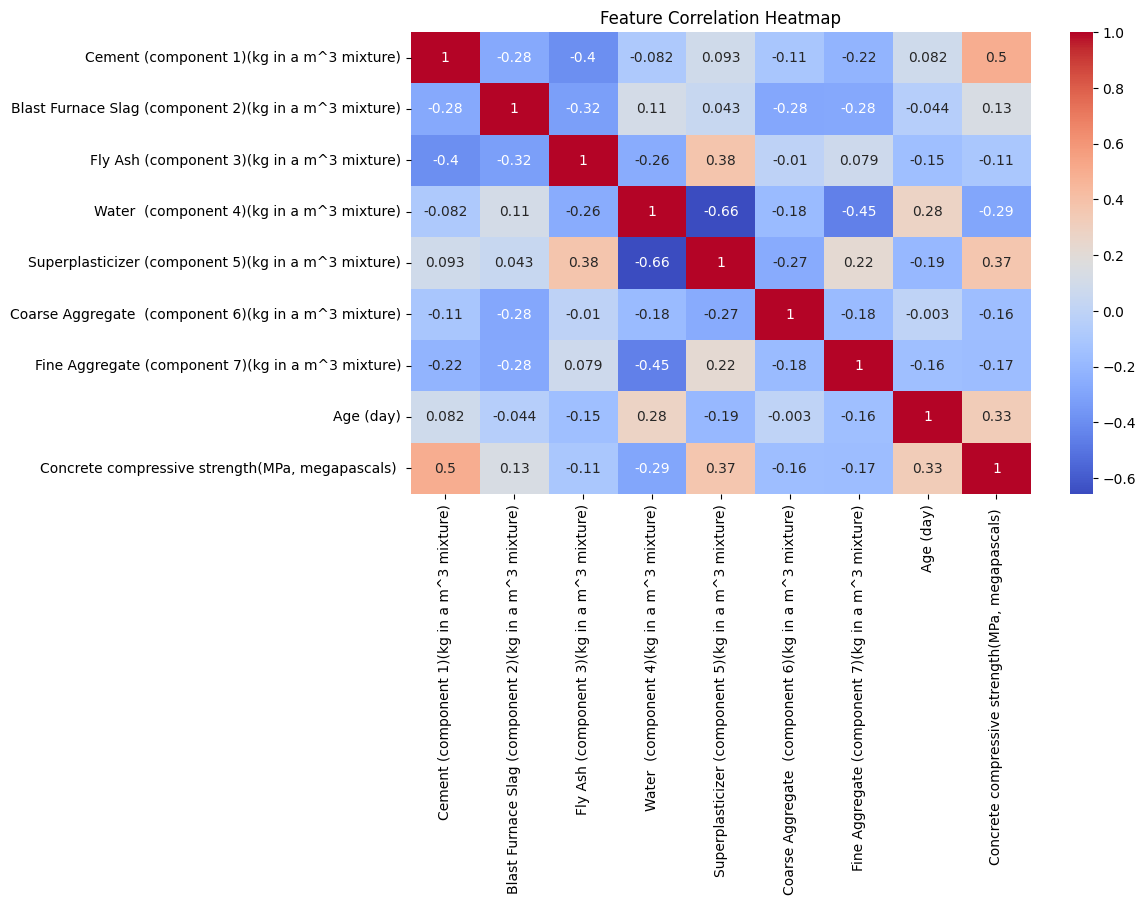

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

<ipython-input-14-fe37e433a65f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_strength = df.groupby('Cement_bins')['Concrete compressive strength(MPa, megapascals) '].mean()


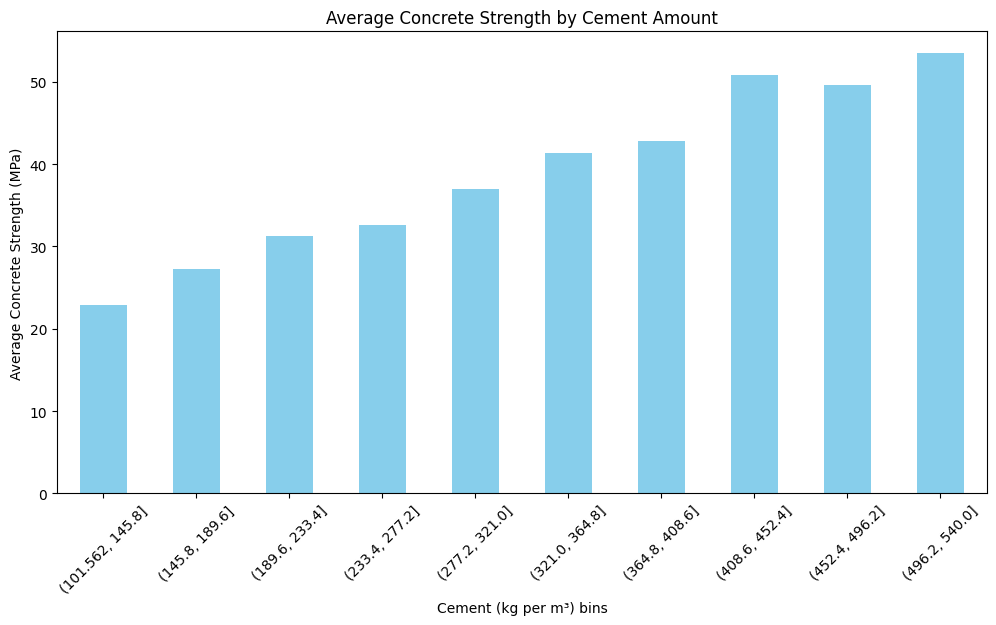

In [ ]:
df['Cement_bins'] = pd.cut(df['Cement (component 1)(kg in a m^3 mixture)'], bins=10)
mean_strength = df.groupby('Cement_bins')['Concrete compressive strength(MPa, megapascals) '].mean()
mean_strength.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.xlabel('Cement (kg per m³) bins')
plt.ylabel('Average Concrete Strength (MPa)')
plt.title('Average Concrete Strength by Cement Amount')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Compressive Strength (MPa)')

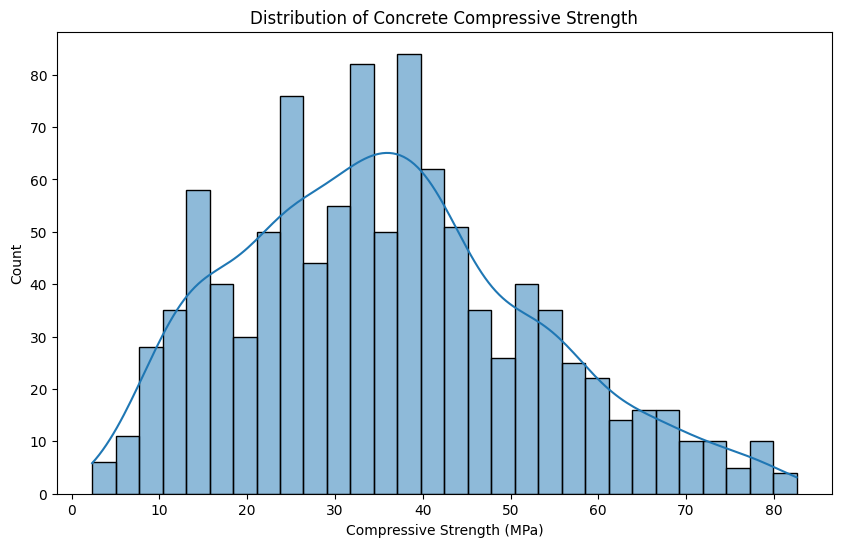

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Concrete compressive strength(MPa, megapascals) '], bins=30, kde=True)
plt.title('Distribution of Concrete Compressive Strength')
plt.xlabel('Compressive Strength (MPa)')

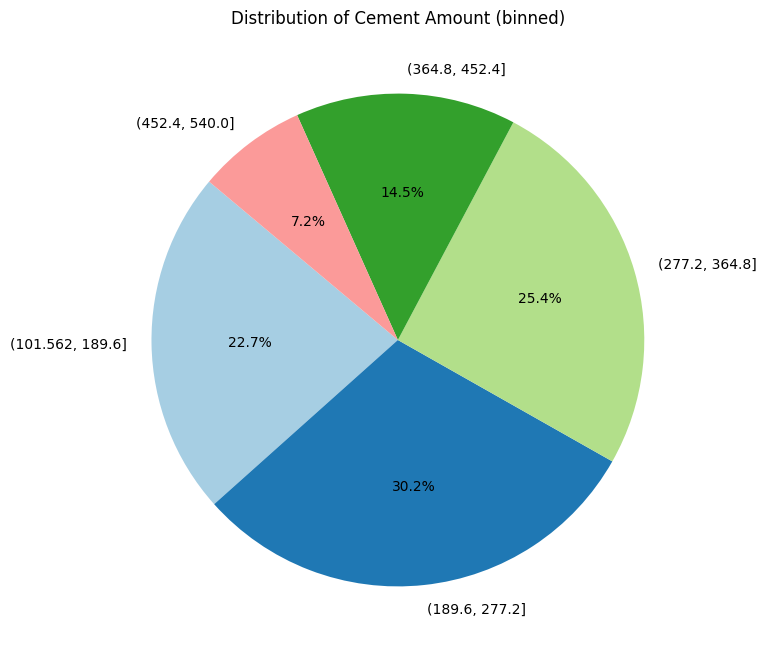

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Cement Amount (binned)')
plt.show()

<ipython-input-21-b5830a52ad0d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cement_Level', data=df, palette='Set2')


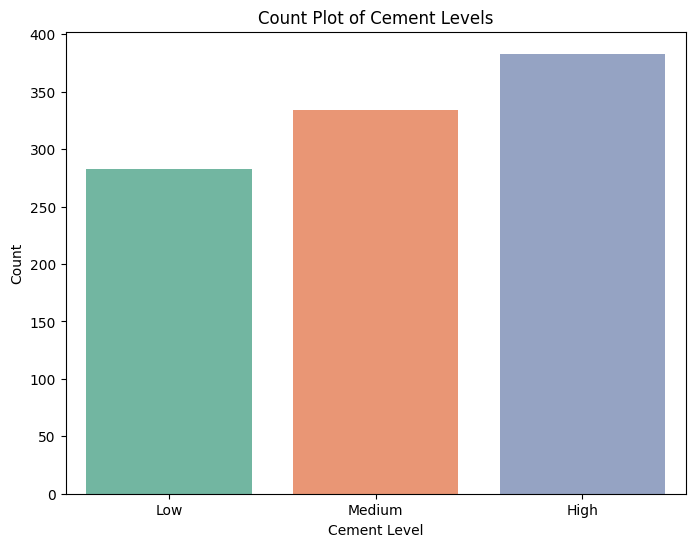

In [ ]:
df['Cement_Level'] = pd.cut(df['Cement (component 1)(kg in a m^3 mixture)'],
                            bins=[0, 200, 300, 500],
                            labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(8,6))
sns.countplot(x='Cement_Level', data=df, palette='Set2')

plt.xlabel('Cement Level')
plt.ylabel('Count')
plt.title('Count Plot of Cement Levels')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Cement vs Concrete Strength')

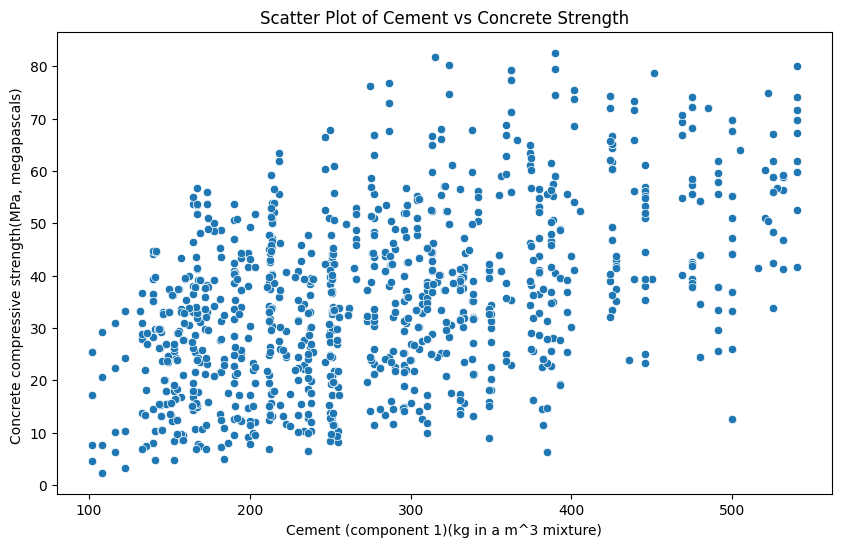

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cement (component 1)(kg in a m^3 mixture)', y='Concrete compressive strength(MPa, megapascals) ', data=df)
plt.title('Scatter Plot of Cement vs Concrete Strength')

In [ ]:
X = df.drop("Concrete compressive strength(MPa, megapascals) ", axis=1)
y = df["Concrete compressive strength(MPa, megapascals) "]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Model Evaluation:
Mean Squared Error (MSE): 95.98
Root Mean Squared Error (RMSE): 9.80
R² Score: 0.63


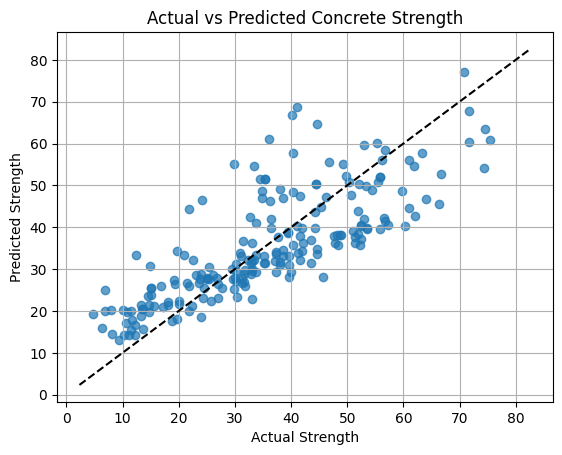

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted Concrete Strength")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # reference line
plt.grid(True)
plt.show()

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [34]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [35]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [36]:
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [40]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(C=100, gamma=0.1)

MSE: 35.79726949080399
R2 Score: 0.8610791744337389


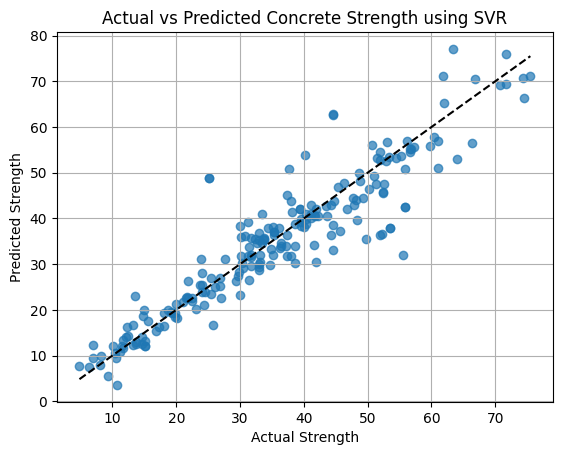

In [39]:
y_pred_scaled = svr_model.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Strength")
plt.ylabel("Predicted Strength")
plt.title("Actual vs Predicted Concrete Strength using SVR")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.grid(True)
plt.show()